The data you need to run this is at gdrive: facial_saliency_research/saliency_differences

In [1]:
import numpy as np
import tensorflow as tf
import os

# from alexnet_backprop import *
from alexnet_guided_bp_vanilla import *
from utils import *

import matplotlib.pyplot as plt
%matplotlib inline
import _pickle

import time

In [2]:
# load test set images
test_images = open('test_set_17_227.pkl', "rb")
data_set = _pickle.load(test_images) 
actor_code = get_actor_code(data_set)[0]
reversed_actor_code = get_actor_code(data_set)[1]

# load weights
weight_fpath = 'e2e17_result_trial2/'
weight_fname = 'end_to_end_learning_weights_17_trial2.pkl'
weight_fname = weight_fpath + weight_fname

In [5]:
with open('diff_saliencies_trial2.pkl', "rb") as handle:
    diff_saliencies = _pickle.load(handle) 

# with open('mean_diff_saliencies_trial2.pkl', "rb") as handle:
#     mean_diff_saliencies = _pickle.load(handle) 

In [7]:
# # def generate_diff_saliency_samples(actors, vs_lists, sample_indices):
# fname = 'pairwise'

# actors = ['America Ferrera', 'Nicolas Cage']
# vs_lists = [['Fran Drescher', 'Nicolas Cage'],['Gerard Butler', 'Daniel Radcliffe']]
# sample_indices = [[12, 13],[12, 14]]
# f, axes = plt.subplots(3, 6, figsize=(80,40))
# plt.subplots_adjust(wspace=0.02, hspace = 0.02)

# num_col_splits = 2
# col_splits = [0+i*3 for i in range(num_col_splits)]

# for _ in range(len(actors)):
#     col = col_splits[_]
#     axes[0][col].set_title(actors[_], fontsize=45)
#     axes[0][col+1].set_title('vs ' + vs_lists[_][0], fontsize=45)
#     axes[0][col+2].set_title('vs ' + vs_lists[_][1], fontsize=45)

# for _ in range(len(actors)):
#     col = col_splits[_]
#     actor = actors[_]
#     for row in range(len(sample_indices[0])):
#         axes[row][col].axis('off')
#         axes[row][col].imshow(data_set[actor][sample_indices[_][row]].astype('uint8'))

#         axes[row][col+1].axis('off')
#         axes[row][col+1].imshow(diff_saliencies[actor][sample_indices[_][row]]\
#                                 [reversed_actor_code[vs_lists[_][0]]])

#         axes[row][col+2].axis('off')
#         axes[row][col+2].imshow(diff_saliencies[actor][sample_indices[_][row]]\
#                                 [reversed_actor_code[vs_lists[_][1]]])
    
    
#     mean_diff = np.sum(mean_diff_saliencies[actor], axis=0)
#     mean_diff = mean_diff/np.max(mean_diff)
# #     axes[-1][col].set_title('Aggregated Differences', fontsize=45)
#     axes[-1][col].axis('off')
#     axes[-1][col].imshow(mean_diff)

#     pairwise_difference = np.sum(diff_saliencies[actor][:, reversed_actor_code[vs_lists[_][0]]], axis =0)
#     pairwise_difference = pairwise_difference/np.max(pairwise_difference)
#     axes[-1][col+1].axis('off')
#     axes[-1][col+1].imshow(pairwise_difference)

#     pairwise_difference = np.sum(diff_saliencies[actor][:, reversed_actor_code[vs_lists[_][1]]], axis=0)
#     pairwise_difference = pairwise_difference/np.max(pairwise_difference)
#     axes[-1][col+2].axis('off')
#     axes[-1][col+2].imshow(pairwise_difference)

# plt.savefig('weight comparison/' + fname +'.png', bbox_inches='tight')
# plt.close()

In [11]:
# def generate_diff_saliency_samples(actors, vs_lists, sample_indices):
fname = 'pairwise'

actors = ['America Ferrera', 'Nicolas Cage']
vs_lists = [['Fran Drescher', 'Nicolas Cage'],['Gerard Butler', 'Daniel Radcliffe']]
sample_indices = [[12],[12]]
f, axes = plt.subplots(2, 6, figsize=(80,26))
plt.subplots_adjust(wspace=0.02, hspace = 0.02)

num_col_splits = 2
col_splits = [0+i*3 for i in range(num_col_splits)]

for _ in range(len(actors)):
    col = col_splits[_]
    axes[0][col].set_title(actors[_], fontsize=45)
    axes[0][col].title.set_position([.5, 1.02])
    axes[0][col+1].set_title('vs ' + vs_lists[_][0], fontsize=45)
    axes[0][col+1].title.set_position([.5, 1.02])
    axes[0][col+2].set_title('vs ' + vs_lists[_][1], fontsize=45)
    axes[0][col+2].title.set_position([.5, 1.02])

for _ in range(len(actors)):
    col = col_splits[_]
    actor = actors[_]
    for row in range(len(sample_indices[0])):
        axes[row][col].axis('off')
        axes[row][col].imshow(data_set[actor][sample_indices[_][row]].astype('uint8'))

        axes[row][col+1].axis('off')
        axes[row][col+1].imshow(diff_saliencies[actor][sample_indices[_][row]]\
                                [reversed_actor_code[vs_lists[_][0]]])

        axes[row][col+2].axis('off')
        axes[row][col+2].imshow(diff_saliencies[actor][sample_indices[_][row]]\
                                [reversed_actor_code[vs_lists[_][1]]])
    
    
    mean_diff = np.sum(mean_diff_saliencies[actor], axis=0)
    mean_diff = mean_diff/np.max(mean_diff)
#     axes[-1][col].set_title('Aggregated Differences', fontsize=45)
    axes[-1][col].axis('off')
    axes[-1][col].imshow(mean_diff)

    pairwise_difference = np.sum(diff_saliencies[actor][:, reversed_actor_code[vs_lists[_][0]]], axis =0)
    pairwise_difference = pairwise_difference/np.max(pairwise_difference)
    axes[-1][col+1].axis('off')
    axes[-1][col+1].imshow(pairwise_difference)

    pairwise_difference = np.sum(diff_saliencies[actor][:, reversed_actor_code[vs_lists[_][1]]], axis=0)
    pairwise_difference = pairwise_difference/np.max(pairwise_difference)
    axes[-1][col+2].axis('off')
    axes[-1][col+2].imshow(pairwise_difference)



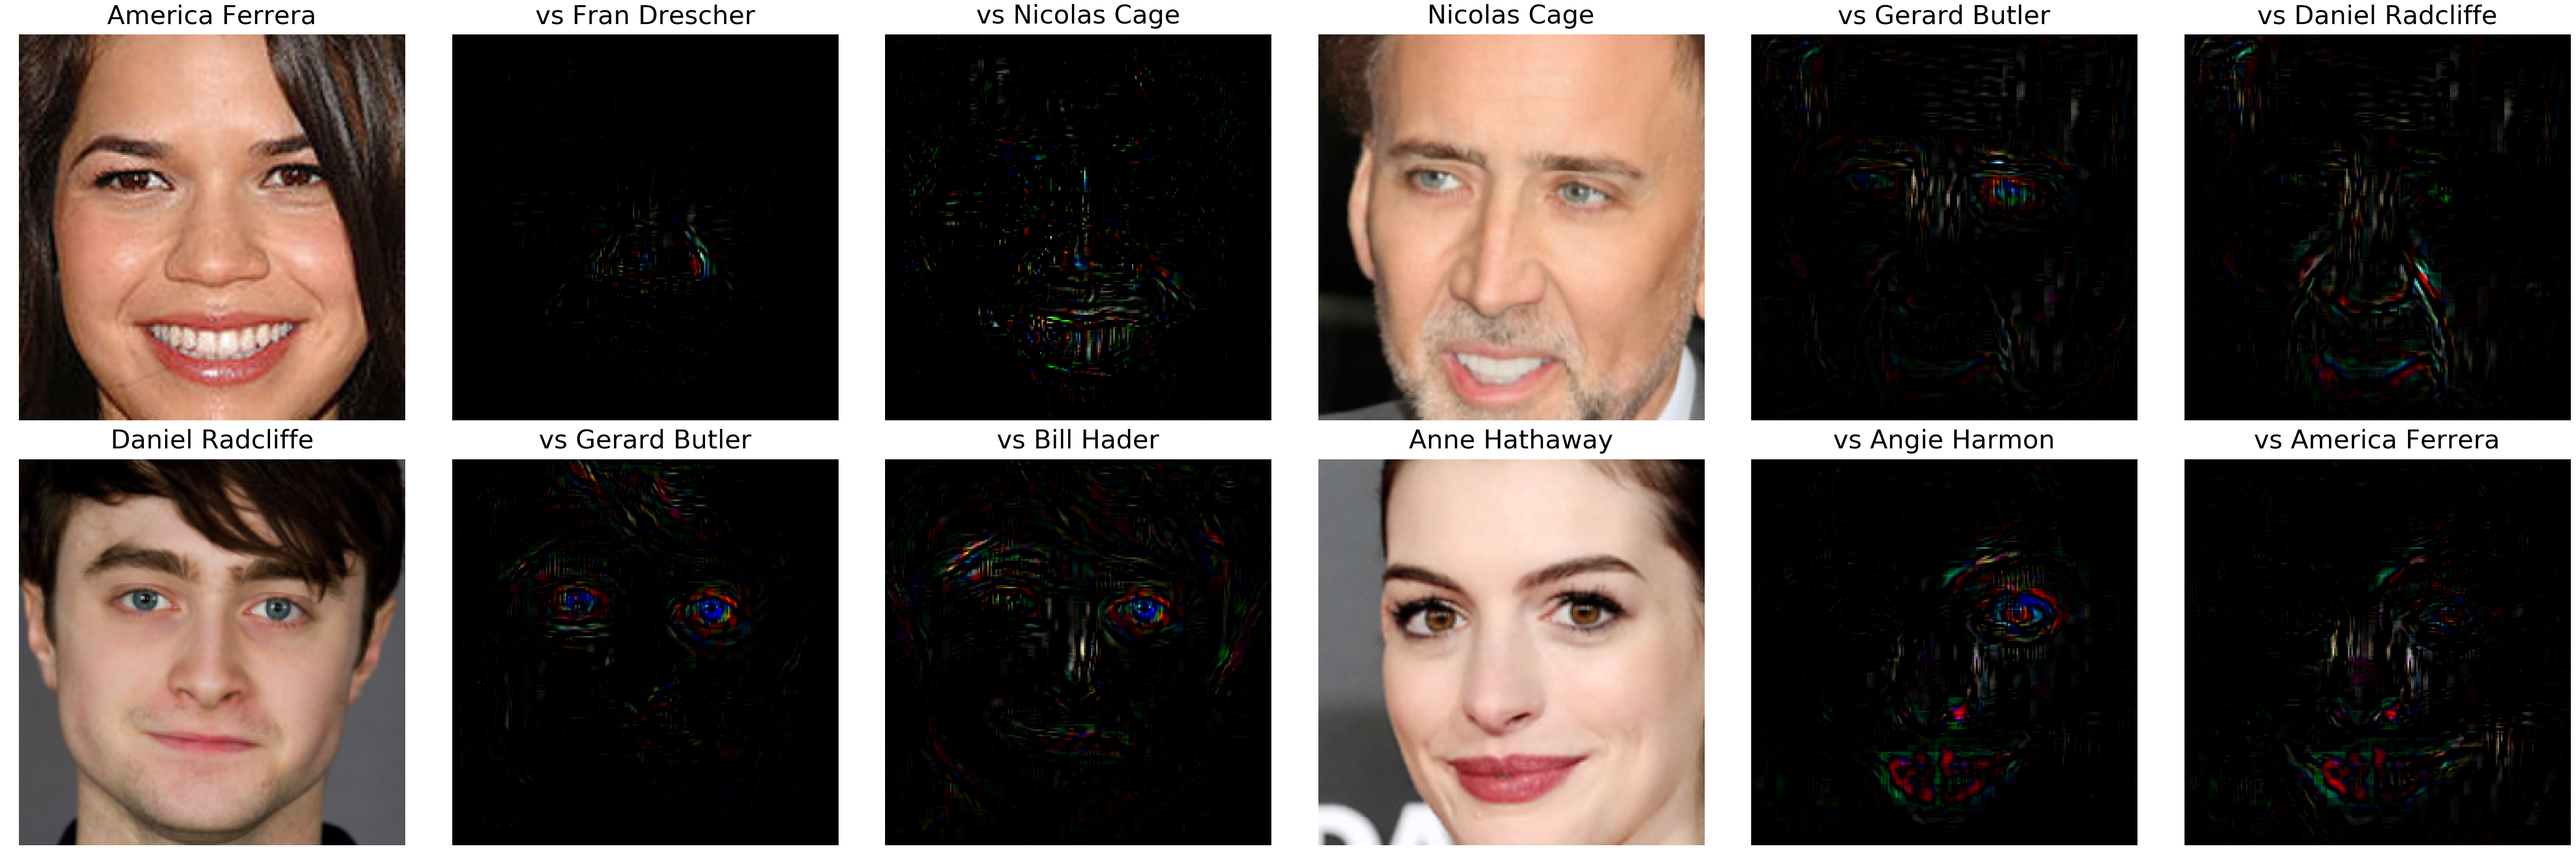

In [6]:
# def generate_diff_saliency_samples(actors, vs_lists, sample_indices):
fname = 'pairwise'

actors = ['America Ferrera', 'Nicolas Cage']
vs_lists = [['Fran Drescher', 'Nicolas Cage'],['Gerard Butler', 'Daniel Radcliffe']]
sample_indices = [[12],[12]]
f, axes = plt.subplots(2, 6, figsize=(80,26))
plt.subplots_adjust(wspace=0.1, hspace = 0.1)

num_col_splits = 2
col_splits = [0+i*3 for i in range(num_col_splits)]

row=0
for _ in range(len(actors)):
    col = col_splits[_]
    axes[row][col].set_title(actors[_], fontsize=45)
    axes[row][col].title.set_position([.5, 1.02])
    axes[row][col+1].set_title('vs ' + vs_lists[_][0], fontsize=45)
    axes[row][col+1].title.set_position([.5, 1.02])
    axes[row][col+2].set_title('vs ' + vs_lists[_][1], fontsize=45)
    axes[row][col+2].title.set_position([.5, 1.02])

for _ in range(len(actors)):
    col = col_splits[_]
    actor = actors[_]
    axes[row][col].axis('off')
    axes[row][col].imshow(data_set[actor][sample_indices[_][row]].astype('uint8'))

    axes[row][col+1].axis('off')
    axes[row][col+1].imshow(diff_saliencies[actor][sample_indices[_][row]]\
                            [reversed_actor_code[vs_lists[_][0]]])

    axes[row][col+2].axis('off')
    axes[row][col+2].imshow(diff_saliencies[actor][sample_indices[_][row]]\
                            [reversed_actor_code[vs_lists[_][1]]])
    
actors = ['Daniel Radcliffe', 'Anne Hathaway']
vs_lists = [['Gerard Butler', 'Bill Hader'],['Angie Harmon', 'America Ferrera']]
sample_indices = [[12],[12]]
    

row=1
for _ in range(len(actors)):
    col = col_splits[_]
    axes[row][col].set_title(actors[_], fontsize=45)
    axes[row][col].title.set_position([.5, 1.02])
    axes[row][col+1].set_title('vs ' + vs_lists[_][0], fontsize=45)
    axes[row][col+1].title.set_position([.5, 1.02])
    axes[row][col+2].set_title('vs ' + vs_lists[_][1], fontsize=45)
    axes[row][col+2].title.set_position([.5, 1.02])

for _ in range(len(actors)):
    col = col_splits[_]
    actor = actors[_]
    axes[row][col].axis('off')
    axes[row][col].imshow(data_set[actor][sample_indices[_][0]].astype('uint8'))

    axes[row][col+1].axis('off')
    axes[row][col+1].imshow(diff_saliencies[actor][sample_indices[_][0]]\
                            [reversed_actor_code[vs_lists[_][0]]])

    axes[row][col+2].axis('off')
    axes[row][col+2].imshow(diff_saliencies[actor][sample_indices[_][0]]\
                            [reversed_actor_code[vs_lists[_][1]]])


In [28]:
f.savefig("pairwise.pdf", bbox_inches='tight')

In [8]:
plt.show()